In [ ]:
import csv

In [ ]:
pathway = ['news_all.csv','forum_all.csv','bbs_clean.csv']

def openCSV(fileName):
    contents = []
    with open(fileName, newline='') as csvfile:

#         讀取 CSV 檔案內容
        content = csv.reader(csvfile)
        next(content)
#         以迴圈輸出每一列
        for row in content:
            contents.append(row)
#         print(len(contents))
        return contents

contents_total = []
for i in pathway:
    contents_total+=openCSV(i) 
    #若是用append會變成直接裝入第二層list，所以要用加的

In [ ]:
contents_total

In [ ]:
total = {}
time = {}
stockKey = ['股價','台股','股票','大盤','股市']

for row in contents_total:
    for x in stockKey:
        if x in row[-1]: 
            if row[0] not in total.keys(): 
                total[row[0]] = row[-1]
                time[row[0]] = row[-4]
            else:
                print(row[0])

In [ ]:
print(len(total))
total

In [ ]:
print(len(time))
time

In [ ]:
criteria_up = []

with open ('up_refine.csv',newline='') as csvfile: #讀看漲關鍵字集
    
    for data in csvfile.readlines():
        data = data.strip()
        criteria_up.append(data)

print(len(criteria_up))
criteria_up

In [ ]:
criteria_down = []

with open ('down_refine.csv',newline='') as csvfile: #讀看漲關鍵字集
    
    for data in csvfile.readlines():
        data = data.strip()
        criteria_down.append(data)

print(len(criteria_down))
criteria_down

In [ ]:
import re #（去掉各種詞）
r1 = u"[^\u4e00-\u9fa5]"#去除英文及符號

def clean(dicName):
    newDic = {}
    for key, value in list(dicName.items()):
        newDic[key]=(re.sub(r1, '', value))
    return newDic

# list不用()，不然是另一種型態，但對操作沒差

In [ ]:
clean_total = clean(total)
print(len(clean_total))
clean_total

In [ ]:
up_paper = {}
down_paper = {}
else_paper = {}

for key, value in list(clean_total.items()):
    up = 0
    down = 0
    for keyU in criteria_up:
        if keyU in value:
            up += 1
#             break
    for keyD in criteria_down:
        if keyD in value:
            down += 1
#             break
    if up > down*1.05:
        up_paper[key] = value
    elif down > up*1.05:
        down_paper[key] = value
    else:
        else_paper[key] = value
        
        
print(len(up_paper),len(down_paper),len(else_paper))

In [ ]:
up_paper

In [ ]:
vector = []

with open ('vector.csv',newline='') as csvfile: #讀看漲關鍵字集
    
    for data in csvfile.readlines():
        data = data.strip()
        vector.append(data)

print(len(vector))
vector

In [ ]:
def buildVec(dicName, vecName):
    result = {}
    
    for key, value in dicName.items(): #每一篇文章
        vec = [0]*len(vecName)
        for index, item in enumerate(vecName): #n是關鍵字
            vec[index] = dicName[key].count(item)      
        result[key] = vec
        
    return result

In [ ]:
up_vec = buildVec(up_paper, vector)

In [ ]:
for key, value in list(up_vec.items()):
    max = 5
    for i in value:
        if i > max:
            max = i
    if max > 5:
        print(key, max)

In [ ]:
print(len(up_vec))

In [ ]:
down_vec = buildVec(down_paper, vector)
print(len(down_vec))

In [41]:
for key, value in list(down_vec.items()):
    max = 20
    for i in value:
        if i > max:
            max = i
    if max > 20:
        print(key, max)

1530660304003_N01 52
1530661233123_N01 52
1532309864823_N01 21
1532656502410_N01 24
1533288293179_N01 40
1533288310892_N01 40
1535681429729_N01 21
1537521768199_N01 56
1537521773602_N01 56
1538612494999_N01 22
1540809997297_N01 40
1540810002192_N01 40
1540886714281_N01 28
1540887573051_N01 28
1541548387197_N01 60
1541751997086_N01 22
1542423246876_N01 22
1543975281640_N01 22
1545868290804_N01 60
1545868307207_N01 60
1468147082782_F01 29
1500222537883_F01 22
1528713684737_F01 29
1461936326591_PTT02R 23
1521038910922_PTT02R 22
1521040741182_PTT02R 22
1538719387425_PTT02R 27
1541859731049_PTT02R 35
1542988256925_PTT02R 28
1543568549889_PTT02R 25


In [ ]:
count = 0

for key, value in list(up_vec.items()):
    if sum(value) >= 0:
        print(key,sum(value))
        count += 1

In [ ]:
count = 0
max_sum = 0
for key, value in list(up_vec.items()):
    if sum(value) > max_sum:
        max_sum = sum(value)
        count += 1
    
print(max_sum)

In [ ]:
count = 0
max_sum = 0
for key, value in list(down_vec.items()):
    if sum(value) > max_sum:
        max_sum = sum(value)
        count += 1
    
print(max_sum)

In [54]:
from sklearn.model_selection import train_test_split as sp
from sklearn.naive_bayes import BernoulliNB as Bnb
from sklearn.naive_bayes import MultinomialNB as Mnb
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.model_selection import cross_val_score

In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [42]:
#大寫代表矩陣，小寫是指標
X_up = []
for value in up_vec.values():
    X_up.append(value)
#看漲為1，看跌為0，數字比較不會出錯
y_up = [0]*len(up_vec)  

In [43]:
#各自切割：看漲
X_up_train, X_up_test, y_up_train, y_up_test = sp(X_up, y_up, test_size = 0.3)                                                                                                               

In [49]:
#各自切割：看跌
X_down = []
for value in down_vec.values():
    X_down.append(value)
    
y_down = [1]*len(down_vec)   

In [50]:
X_down_train, X_down_test, y_down_train, y_down_test = sp(X_down, y_down, test_size = 0.3)   

In [53]:
#相加看漲看跌
X_train = X_up_train + X_down_train
print(len(X_train))
X_test = X_up_test + X_down_test
print(len(X_test))
y_train = y_up_train + y_down_train
print(len(y_train))
y_test = y_up_test + y_down_test
print(len(y_test))

29066
12459
29066
12459


In [116]:
#各個演算法的function
clfList = ['Bnb','Mnb','knn','svm','dt','rf']

seed = 0
def clf(clfName, Xtn, Xtt, ytn, ytt):
    
    if 'svm' not in str(clfName):
        if ('dt' or 'rf') in str(clfName):
            clfName_clf = clfName(max_depth = 10)
        else:
            clfName_clf = clfName()
    if 'svm' in str(clfName):
        seed = svm.SVC(kernel='linear', C=1).fit(Xtn, ytn)
        # C為平滑度，愈平滑愈不會overfit
    else:        
        seed = clfName_clf.fit(Xtn, ytn)
#     clfName_clf.score(x_test, y_test)
    
    scores_clfName = cross_val_score(clfName_clf, Xtt, ytt, cv=5)
    
    clf = [clfName_clf.score(Xtt, ytt), scores_clfName.mean(), scores_clfName]

    titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(seed, X_test, y_test,
                                 display_labels=['up','down'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    plt.show()
    
    return clf

Confusion matrix, without normalization
[[5659    5]
 [ 285 6510]]
Normalized confusion matrix
[[9.99117232e-01 8.82768362e-04]
 [4.19426049e-02 9.58057395e-01]]


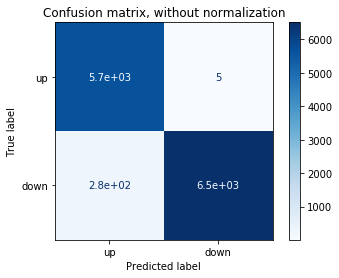

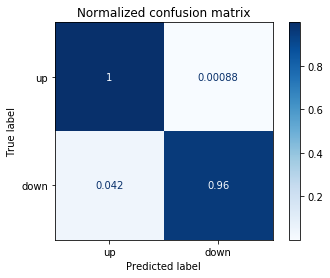

In [93]:
rf_clf = clf(rf,X_train, X_test, y_train, y_test)

In [94]:
rf_clf

[0.9767236535837547,
 0.9666910025369017,
 array([0.96388443, 0.96147673, 0.97110754, 0.9670947 , 0.96989161])]

Confusion matrix, without normalization
[[5587   77]
 [ 226 6569]]
Normalized confusion matrix
[[0.98640537 0.01359463]
 [0.03325975 0.96674025]]


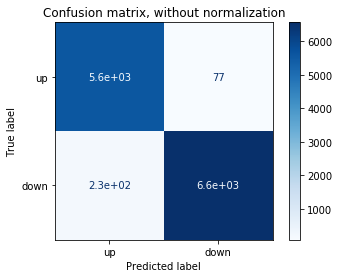

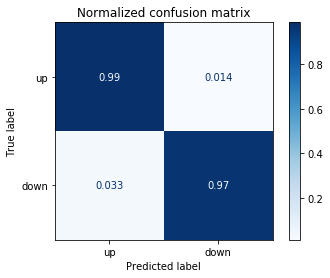

[0.9756802311581989,
 0.9659684656094203,
 array([0.96187801, 0.96308186, 0.96829856, 0.96950241, 0.96708149])]

In [111]:
dt_clf = clf(dt, X_train, X_test, y_train, y_test)
dt_clf

Confusion matrix, without normalization
[[5601   63]
 [ 201 6594]]
Normalized confusion matrix
[[0.98887712 0.01112288]
 [0.02958057 0.97041943]]


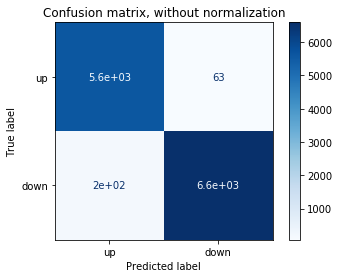

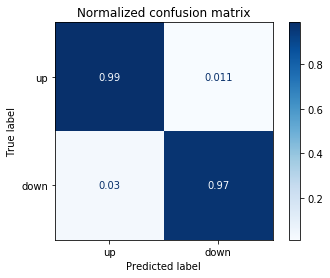

[0.9788104984348663,
 0.9761621451994434,
 array([0.9747191 , 0.97431782, 0.97552167, 0.97592295, 0.98032919])]

In [112]:
Bnb_clf = clf(Bnb, X_train, X_test, y_train, y_test)
Bnb_clf

Confusion matrix, without normalization
[[5576   88]
 [ 315 6480]]
Normalized confusion matrix
[[0.98446328 0.01553672]
 [0.04635762 0.95364238]]


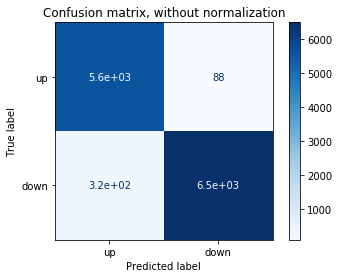

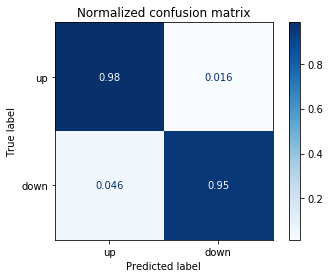

[0.9676539048077695,
 0.9658885309747515,
 array([0.96348315, 0.96589085, 0.96629213, 0.96268058, 0.97109595])]

In [113]:
Mnb_clf = clf(Mnb, X_train, X_test, y_train, y_test)
Mnb_clf

Confusion matrix, without normalization
[[5538  126]
 [ 605 6190]]
Normalized confusion matrix
[[0.97775424 0.02224576]
 [0.08903606 0.91096394]]


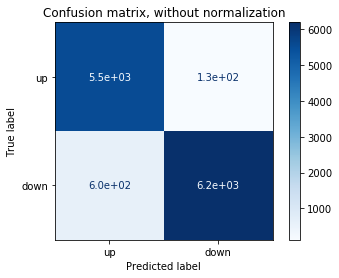

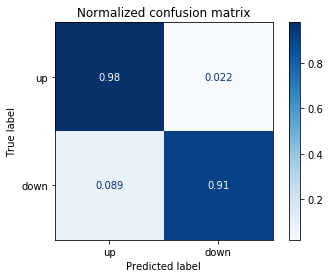

[0.941327554378361,
 0.9341841866675086,
 array([0.92857143, 0.93820225, 0.93699839, 0.93218299, 0.93496588])]

In [114]:
knn_clf = clf(knn, X_train, X_test, y_train, y_test)
knn_clf

In [118]:
va = svm.SVC(kernel='linear', C=1).fit(x_train, y_train)

In [119]:
va.score(x_test, y_test)

0.9964684164058111

In [120]:
scores = cross_val_score(va, x_test, y_test, cv=5)

In [121]:
scores.mean()

0.9957460340371403

Confusion matrix, without normalization
[[5643   21]
 [  23 6772]]
Normalized confusion matrix
[[0.99629237 0.00370763]
 [0.00338484 0.99661516]]


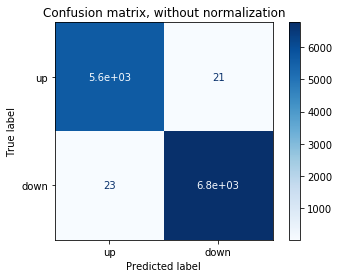

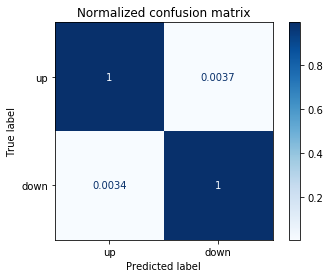

In [122]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(va, x_test, y_test,
                                 display_labels=['up','down'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
import pandas as pd

In [ ]:
result_up = pd.DataFrame([(y, time[y], clean_total[y],'up', up_vec[y]) for y in list(up_paper.keys())])
result_up

In [ ]:
result_down = pd.DataFrame([(y, time[y], clean_total[y],'down', down_vec[y]) for y in list(down_paper.keys())])
result_down

In [ ]:
result = result_up.append(result_down)
print(len(result))
result

In [ ]:
with pd.ExcelWriter('StockAll_paper.xlsx') as writer:
    result.to_excel(writer, index = False , header = ['id', 'time', 'content', 'class', 'vec'])